In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from cross_validation import *
from proj1_helpers import *
from implementations import *
from helpers import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data loading

In [3]:
y, x, ids = load_csv_data('../data/train.csv')
labels = np.array(np.genfromtxt('../data/train.csv', delimiter=",", names=True).dtype.names[2:])
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("mse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)

# Baseline

0.255152 7.74263682681e-10


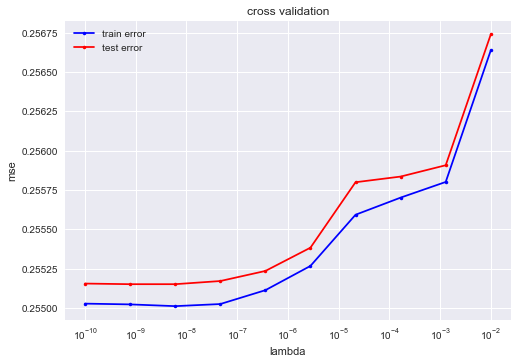

In [8]:
lambdas = np.logspace(-10,-2,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=1)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print(np.min(rmse_te), lambdas[np.argmin(rmse_te)])

## Group Separation

0.234424 1e-10


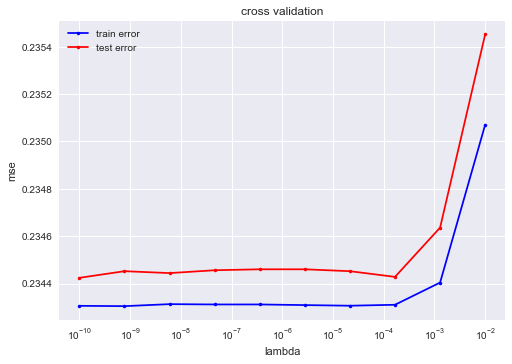

In [23]:
lambdas = np.logspace(-10,-2,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    sup_args = [{'lambda_': lambda_}]*6
    rmse_tr_, rmse_te_ = cross_validation_group(y, x, 10, ridge_regression, sup_args=sup_args, seed=1)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print(np.min(rmse_te), lambdas[np.argmin(rmse_te)])

# Percentile cut

0.248784 1e-10


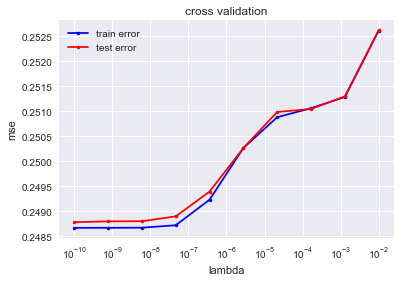

In [26]:
lambdas = np.logspace(-10,-2,10)
rmse_tr = []
rmse_te = []
x_cut = cut_at_percentile(x, 95)
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x_cut, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=1)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print(np.min(rmse_te), lambdas[np.argmin(rmse_te)])

# Log-normalization

0.2618 7.74263682681e-10


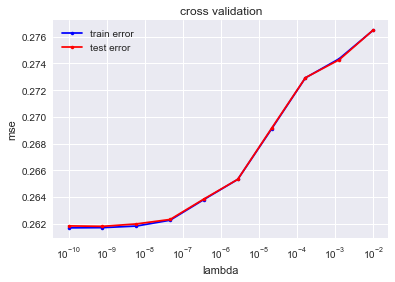

In [32]:
def log_normalize(x):
    if x > 0:
        return np.log(x)
    return x
log_normalize = np.vectorize(log_normalize)

x_normalized = x.copy()
x_normalized[:, [0, 1, 2, 3, 5, 8, 9, 10, 13, 19, 21, 23, 26, 29]] = log_normalize(x[:, [0, 1, 2, 3, 5, 8, 9, 10, 13, 19, 21, 23, 26, 29]])
lambdas = np.logspace(-10,-2,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x_normalized, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=1)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print(np.min(rmse_te), lambdas[np.argmin(rmse_te)])

# Removing useless features

0.252068 1e-10


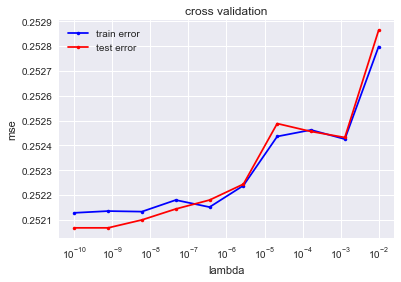

In [30]:
filter_ = [idx for idx, label in enumerate(labels) if 'phi' not in label]
x_filtered = x[:, filter_]
lambdas = np.logspace(-10,-2,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x_filtered, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=1)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print(np.min(rmse_te), lambdas[np.argmin(rmse_te)])

# Feature augmenting

0.229108 1e-10


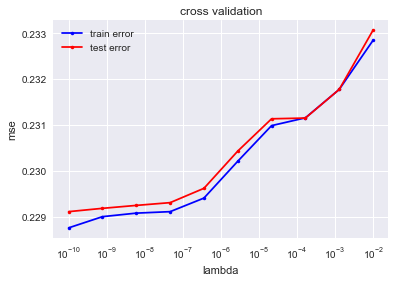

In [31]:
lambdas = np.logspace(-10,-2,10)
rmse_tr = []
rmse_te = []
degree = 3
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x, 10, ridge_regression_with_poly, accuracy_with_poly, {'lambda_': lambda_, 'degree': degree}, {'degree': degree}, seed=1)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)
print(np.min(rmse_te), lambdas[np.argmin(rmse_te)])

# Final Model

In [34]:
x_cut = cut_at_percentile(x, 95)
args = [{'lambda_': 0, 'degree': 7}, {'lambda_': 0, 'degree': 5}, {'lambda_': 1e-4, 'degree': 9},\
       {'lambda_': 1.66e-8, 'degree': 4}, {'lambda_': 4.64e-4, 'degree': 8}, {'lambda_': 0, 'degree': 4}]
cross_validation_group(y, x_cut, 10, ridge_regression_with_poly, args)

(0.16707022222222223, 0.16809999999999997)